In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
plt.rcParams['figure.figsize'] = 8,8
import keras
from scipy.ndimage.interpolation import zoom
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions 
from keras.applications import ResNet50

import numpy as np
import os,cv2
from scipy.ndimage.interpolation import zoom
import numpy as np
import tensorflow as tf
from keras.backend import tensorflow_backend
from keras import backend as K
from keras.preprocessing.image import load_img, img_to_array
import tensorflow.compat.v1 as tf
 
from keras import backend as K
K.clear_session()
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
model = VGG16(include_top=True, weights='imagenet',input_shape=(224,224,3))

In [3]:

def impr(im):
    ar=[]
    img = np.asarray(im) 
    ar.append(img) 
    ay = np.asarray(ar)
    return ay



def pltm(img):
    figure(num=None, figsize=(4, 3), dpi=80)
    plt.imshow(img,alpha= .9,cmap="jet") 
    
def pltb(img1,img2):
    figure(num=None, figsize=(4, 3), dpi=80)
    plt.imshow(img1)
    plt.imshow(img2,alpha= .9,cmap="jet") 
    
    
def postp(ima):
    im=abs(ima)
    im=im/np.max(im)
    return im

In [4]:
def f1(model,n,img):
    variable = model.input
    loss = model.layers[n].output
    grads = K.gradients(loss, variable)
    func = K.function([variable], [grads, loss])
    w, loss_value = func(img)
    y=np.asarray(w)
    return y 

In [5]:
from matplotlib.pyplot import figure

im0=plt.imread("1.png") 
im0=cv2.resize(im0, (224,224), interpolation=cv2.INTER_LINEAR)
im=im0
im1=np.uint8(im*255)
#a= cv2.cvtColor(a1, cv2.COLOR_BGR2RGB) 
im1=np.float32(im1)
am=preprocess_input(im1)

bm=impr(am)

 

## Input_gradient

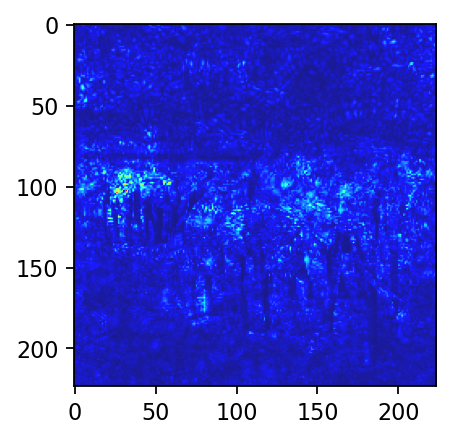

In [6]:
 
w=f1(model,-1,bm)
M = np.max(np.absolute(w[0][0]), axis=2)


ml=M/np.max(M)
rc=im[:,:,0]/255 
ag=ml*rc
ag=np.clip(ag,0,1)

figure(num=None, figsize=(4, 3), dpi=80)
plt.imshow(ag ,alpha= .9,cmap="jet") 

## For a layer


In [7]:
cls = np.argmax(model.predict(bm))
y_c = model.output[0, cls]

j=13
conv_output = model.get_layer(index=j).output
ws=model.get_layer(index = j).get_weights()
ws=np.asarray(ws)
bs=ws[1]

grads = K.gradients(y_c, conv_output)[0] 
d=K.function([model.input],[grads])
f=d(bm)
s=np.asarray(f)
aq=s[0,0,:,:,:]*bs
aq.shape
 

(28, 28, 512)

<Figure size 576x576 with 0 Axes>

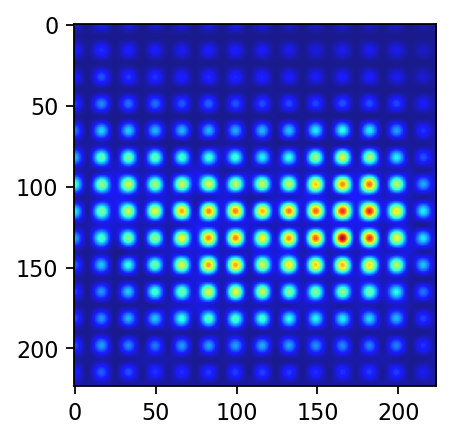

<Figure size 576x576 with 0 Axes>

In [8]:
la1=0
for i in range(aq.shape[2]):
    la=aq[:,:,i] 
    la=postp(la)
    la1=la1+la

la1=zoom(la1,224/la1.shape[0])
la2=postp(la1)

pltm(la2)
plt.figure()
 

In [9]:
def B_grad_any(model,ix,img,y_c):
    ct = model.get_layer(index=ix).output
    wt=model.get_layer(index = ix).get_weights()
    wr=np.asarray(wt)
    if len(wr)==2:
        bas=wr[1]
    else:
        bas=1
    gs = K.gradients(y_c, ct)[0]
    dt=K.function([model.input],[gs])
    fm=dt(img)
    ls=np.asarray(fm)
    dh=ls[0,0,:,:,:]*bas
    return dh

def B_ary(arys):
    itn=0
    for i in range(arys.shape[2]):
        u1=arys[:,:,i] 
        u1=postp(u1)
        itn=itn+u1
    ot=zoom(itn,224/itn.shape[0])
    ot=postp(ot)
    return ot

    
 

## For any layer

<Figure size 576x576 with 0 Axes>

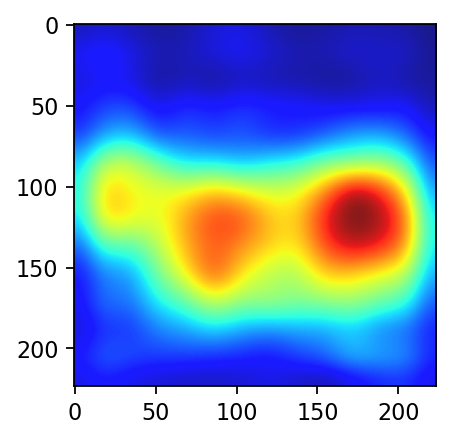

<Figure size 576x576 with 0 Axes>

In [10]:
aqdm=B_grad_any(model,15,bm,y_c)

lam=B_ary(aqdm)


pltm(lam)
plt.figure()

In [11]:
l_name=model.layers
conv_id=list()

for j in range(len(l_name)):
 
  if 'conv' in l_name[j].name:
    print(j,  model.get_layer(index = j).name)
    conv_id.append(j)
    
conv_id=np.asarray(conv_id)

1 block1_conv1
2 block1_conv2
4 block2_conv1
5 block2_conv2
7 block3_conv1
8 block3_conv2
9 block3_conv3
11 block4_conv1
12 block4_conv2
13 block4_conv3
15 block5_conv1
16 block5_conv2
17 block5_conv3


### Agregating the map from the conv layers only

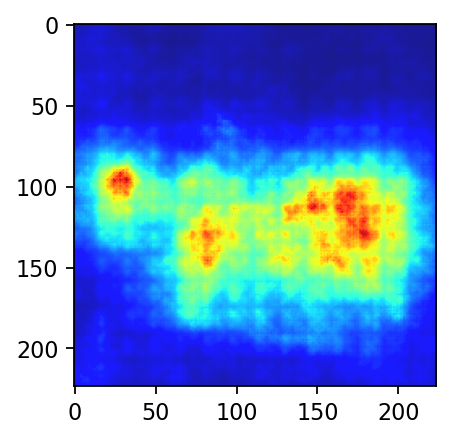

In [12]:


Br=0
 
for i in range(len(conv_id)-2):
    lr_id=conv_id[i+1]
    aqr=B_grad_any(model,lr_id,bm,y_c)
    lar=B_ary(aqr)
    Br=Br+lar
 
 
pltm(Br)

<Figure size 576x576 with 0 Axes>

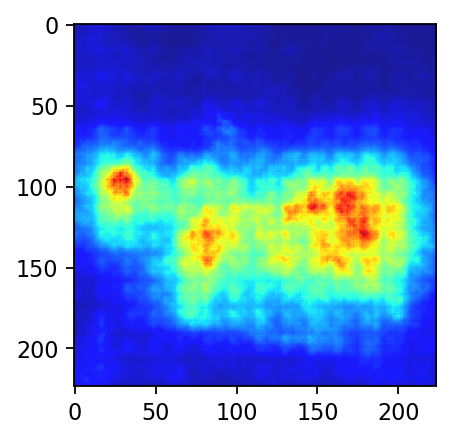

<Figure size 576x576 with 0 Axes>

In [13]:
total_aggregated= Br+ag
pltm(total_aggregated)
plt.figure()  

 

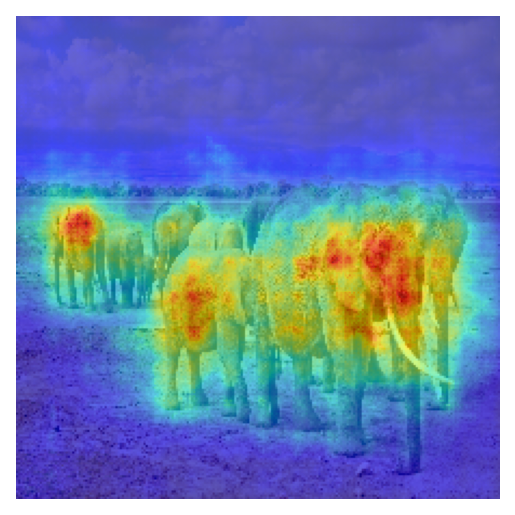

In [14]:
total_aggregate=np.expand_dims(total_aggregated,axis=2)



figure(num=None, figsize=(6, 4), dpi=80)
plt.imshow(im0)
plt.imshow(total_aggregate, cmap='jet', alpha=0.6)  
plt.axis('off')
plt.savefig('B1.png',bbox_inches = 'tight',pad_inches = 0)